In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats

import os, sys

project_root = '/user_data/mmhender/featsynth/'
sys.path.insert(0, os.path.join(project_root, 'code'))
from utils import stats_utils, plot_utils
from behav_analysis import analyze_expt1

/home/mmhender/.local/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


#### Load human behav data

In [2]:
super_names, super_cbinds, basic_names, basic_inds, \
        super_names_long, super_inds_long, n_basic, n_super, n_basic_each_super = \
            analyze_expt1.get_categ_info()

trial_data_all, subjects, subject_cb, cue_level_names, image_type_names = analyze_expt1.load_data()
 
n_subjects = len(subjects)
n_cue_levels = len(cue_level_names)
n_image_types = len(image_type_names)

acc_by_supcat, dprime_by_supcat = analyze_expt1.get_perf_by_supercateg()
acc_by_bascat, dprime_by_bascat = analyze_expt1.get_perf_by_basiccateg()
acc_by_bascat_combinesubs, dprime_by_bascat_combinesubs = analyze_expt1.get_perf_by_basiccateg_combinesubjects()

acc_by_condition, dprime_by_condition, propyes_by_condition, rt_by_condition = analyze_expt1.get_perf_by_cond()


#### Load image discriminability 

In [5]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1.npy')
d = np.load(fn2load, allow_pickle=True).item()
d.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [6]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt1_shuffle.npy')
d_shuff = np.load(fn2load, allow_pickle=True).item()
d_shuff.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

In [7]:
save_dir = os.path.join(project_root, 'features', 'simclr', 'categ_discrim')
fn2load = os.path.join(save_dir, 'categ_discrim_images_expt2.npy')
d_gray = np.load(fn2load, allow_pickle=True).item()
d_gray.keys()

dict_keys(['acc_super_overall', 'dprime_super_overall', 'acc_basic_overall', 'dprime_basic_overall', 'acc_each_supcat', 'acc_each_bascat', 'dprime_each_supcat', 'dprime_each_bascat'])

#### Params for plotting

In [8]:
cue_level_colors = np.array([[93,192,219], [44,92,168]])/255
point_types = ['o','x']
markersize = 4;
xjitters = [-0.02, 0.02]

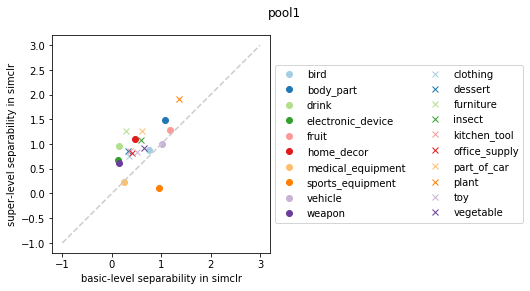

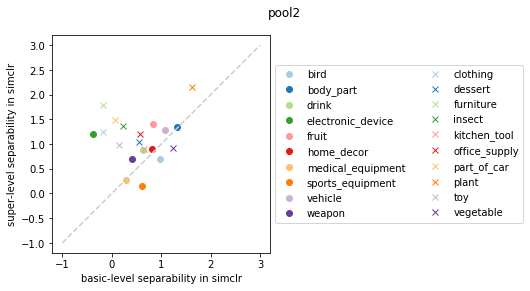

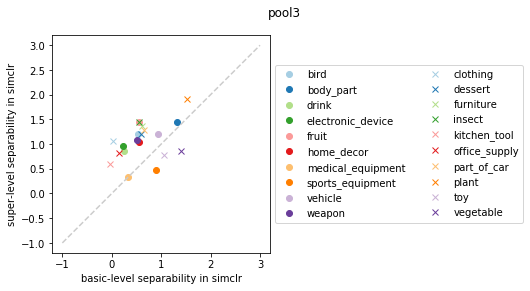

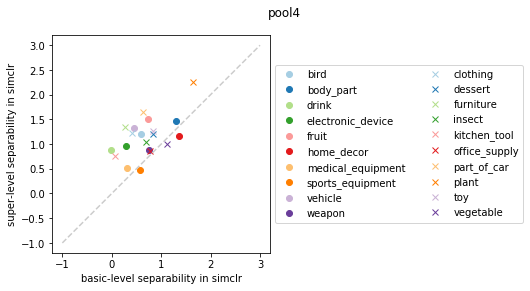

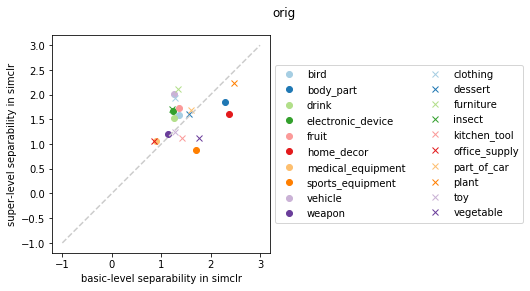

In [9]:
for ii in range(5):
    
    plt.figure(figsize=(12,4))

    lims = [-1, 3.0]

    ax = plt.subplot(1,1,1)

    allh = []
    # pi=0
    for cbi in [0,1]:

        # pi+=1
        
        supnames = super_names[super_cbinds==cbi]

        # overall performance at basic-level classification, within supcat
        dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

        # performance at super-ordinate classification, for each supcat
        dist2 = d['dprime_each_supcat'][super_cbinds==cbi, ii]
        
        assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
        assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

        basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]
        
        for bi in range(len(dist1)):

            h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

            allh+=[h]

    # plt.title('image set %d'%(cbi+1))

    plt.xlabel('basic-level separability in simclr')
    plt.ylabel('super-level separability in simclr')

    plt.xlim(lims)
    plt.ylim(lims)

    plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

    plt.axis('square')
    # Put a legend to the right of the current axis
    ax.legend(allh, super_names, loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


    plt.suptitle(image_type_names[ii])

#### Natural and artificial categories separately

0.0960568192102087
(0.3099303457395044, 0.2808675389978255)
0.19682269409942488
(0.44364703774444936, 0.3781893459823719)
0.0021619495498479413
(0.046496769240971285, 0.8745841523573477)
0.39831328509990993
(0.6311206581153164, 0.17901088414118985)
0.34115863474980856
(0.5840878656074004, 0.028289196724826497)
6.740926798021185e-05
(0.008210314730838414, 0.9876848046293952)
0.30119430645209555
(0.5488117222254784, 0.04211447638275046)
0.5631061945796609
(0.7504040208978502, 0.0856725449557572)
0.19173068660374348
(0.4378706277015434, 0.11736979570774544)
0.14142316705241353
(0.37606271691356763, 0.46249791484777464)


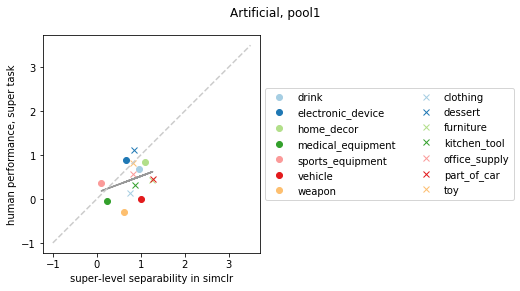

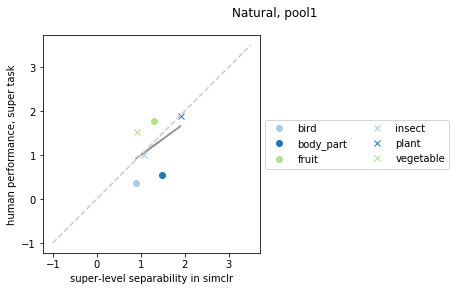

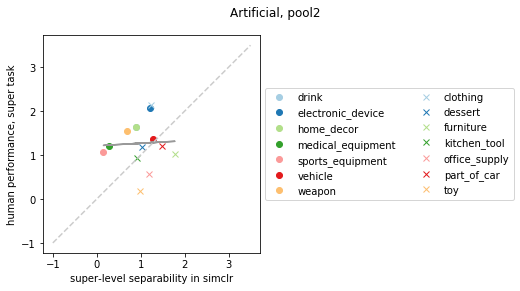

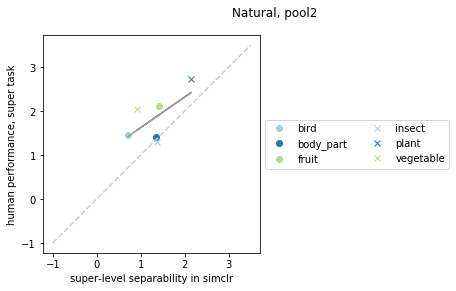

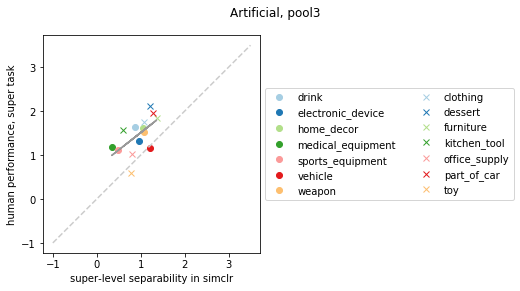

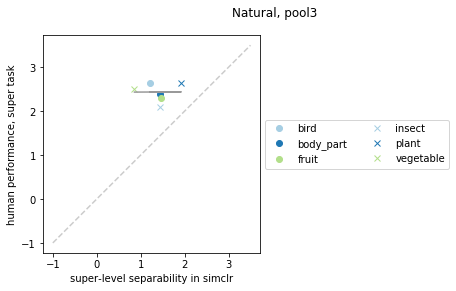

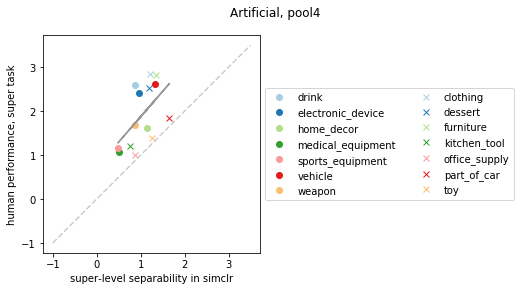

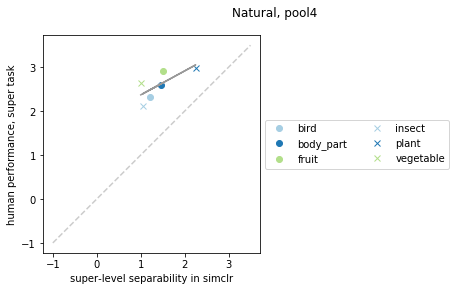

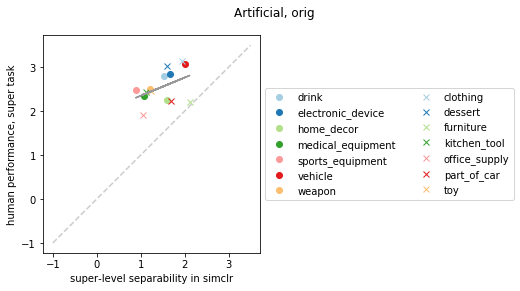

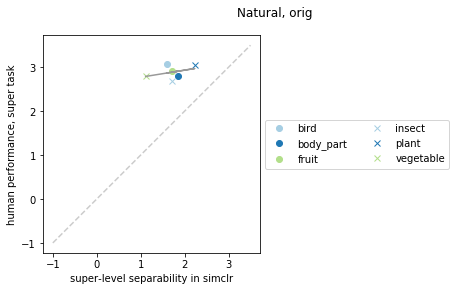

In [14]:
is_natural = np.array([1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1]).astype(bool)
kind_names = ['Artificial','Natural']
n_kinds = len(kind_names)

for cc in [1]:

    for ii in range(5):
        
        for kk in range(n_kinds):

            plt.figure(figsize=(12,4))

            lims = [-1, 3.5]

            ax = plt.subplot(1,1,1)

            xvals = []; yvals = []
            # pi=0
            # pi = 1
            allh = []
            for cbi in [0,1]:


                # SimCLR performance at super-level classification, within supcat
                dist1 = d['dprime_each_supcat'][(super_cbinds==cbi) & (is_natural==kk),ii]

                # human performance at basic-level classification, for each supcat
                dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)
                dist2 = dist2[is_natural[(super_cbinds==cbi)]==kk]
                
                xvals+=[dist1]
                yvals+=[dist2]

                assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
                assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

                basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

                for bi in range(len(dist1)):

                    h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                    allh+=[h]

            xvals = np.concatenate(xvals)
            yvals = np.concatenate(yvals)
            yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
            plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
            print(r2)
            print(scipy.stats.pearsonr(xvals, yvals))


            # plt.title('image set %d'%(cbi+1))

            plt.xlabel('super-level separability in simclr')
            plt.ylabel('human performance, %s task'%cue_level_names[cc])

            plt.xlim(lims)
            plt.ylim(lims)

            plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

            plt.axis('square')
            # Put a legend to the right of the current axis
            ax.legend(allh, list(super_names[is_natural==kk]), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


            plt.suptitle('%s, %s'%(kind_names[kk], image_type_names[ii]))

In [13]:
dprime_by_supcat[cbi].shape

(24, 2, 5, 10)

0.3155605806785974
(0.5617477909868425, 0.009949671829803705)
0.11589823283293366
(0.34043829519155683, 0.14190180990333723)
0.45847554324597783
(0.6771082212216728, 0.0010406147648030588)
0.4013286204549483
(0.6335050279634318, 0.002710438798977093)
0.22883176585747256
(0.4783636335022477, 0.03288011056226554)


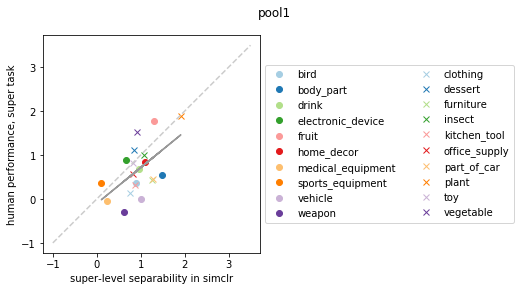

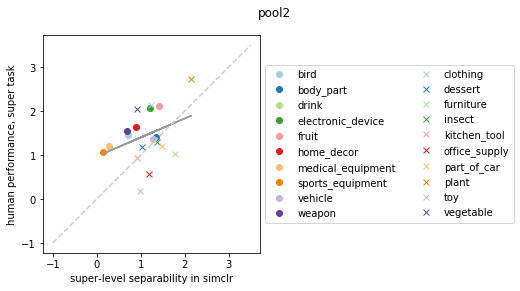

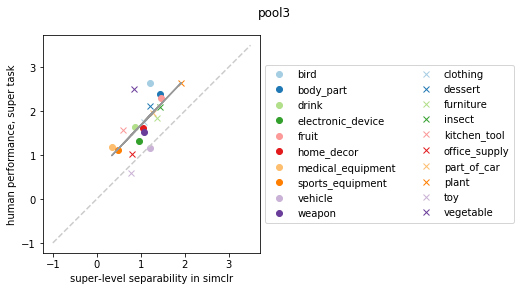

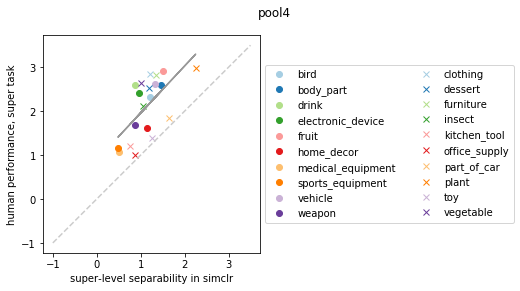

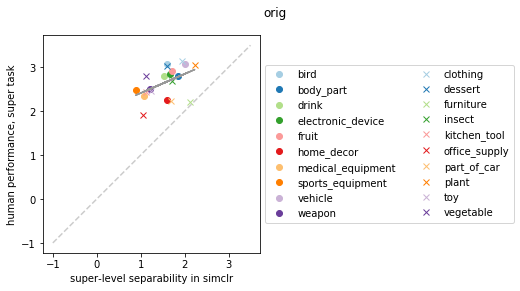

In [12]:
for cc in [1]:

    for ii in range(5):

        plt.figure(figsize=(12,4))

        lims = [-1, 3.5]

        ax = plt.subplot(1,1,1)

        xvals = []; yvals = []
        # pi=0
        # pi = 1
        allh = []
        for cbi in [0,1]:


            # SimCLR performance at super-level classification, within supcat
            dist1 = d['dprime_each_supcat'][super_cbinds==cbi,ii]

            # human performance at basic-level classification, for each supcat
            dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)

            xvals+=[dist1]
            yvals+=[dist2]

            assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
            assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

            basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

            for bi in range(len(dist1)):

                h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                allh+=[h]

        xvals = np.concatenate(xvals)
        yvals = np.concatenate(yvals)
        yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
        plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
        print(r2)
        print(scipy.stats.pearsonr(xvals, yvals))


        # plt.title('image set %d'%(cbi+1))

        plt.xlabel('super-level separability in simclr')
        plt.ylabel('human performance, %s task'%cue_level_names[cc])

        plt.xlim(lims)
        plt.ylim(lims)

        plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

        plt.axis('square')
        # Put a legend to the right of the current axis
        ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


        plt.suptitle(image_type_names[ii])

In [12]:
for cc in range(n_cue_levels):

    for ii in range(n_image_types):
    
        # SimCLR performance at super-level classification, within supcat
        simclr_dprime_super = d['dprime_each_supcat'][:,ii]

        # SimCLR performance at basic-level classification, within supcat
        simclr_dprime_basic = d['dprime_basic_overall'][ii,:]

        # human performance at classification, for each supcat
        human_dprime = np.concatenate([np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0) for cbi in [0,1]], axis=0)
   
        print('%s %s task:'%(image_type_names[ii], cue_level_names[cc]))
    
        out = stats_utils.compute_partial_corr(simclr_dprime_super, human_dprime, simclr_dprime_basic, return_p=True)
        print('  super partial corr: %.2f, p=%.5f'%(out[0], out[1]))
        out = stats_utils.compute_partial_corr(simclr_dprime_basic, human_dprime, simclr_dprime_super, return_p=True)
        print('  basic partial corr: %.2f, p=%.5f'%(out[0], out[1]))

pool1 basic task:
  super partial corr: 0.25, p=0.29779
  basic partial corr: 0.15, p=0.53927
pool2 basic task:
  super partial corr: -0.18, p=0.44353
  basic partial corr: 0.24, p=0.30951
pool3 basic task:
  super partial corr: -0.04, p=0.86558
  basic partial corr: 0.48, p=0.03283
pool4 basic task:
  super partial corr: -0.20, p=0.40163
  basic partial corr: 0.15, p=0.52530
orig basic task:
  super partial corr: -0.04, p=0.86693
  basic partial corr: -0.07, p=0.77701
pool1 super task:
  super partial corr: 0.43, p=0.05823
  basic partial corr: 0.23, p=0.32543
pool2 super task:
  super partial corr: 0.33, p=0.15671
  basic partial corr: 0.30, p=0.20599
pool3 super task:
  super partial corr: 0.62, p=0.00332
  basic partial corr: 0.10, p=0.68220
pool4 super task:
  super partial corr: 0.67, p=0.00135
  basic partial corr: -0.31, p=0.18985
orig super task:
  super partial corr: 0.45, p=0.04889
  basic partial corr: 0.04, p=0.87423


0.08932731903589719
(0.2988767622882336, 0.20052634173521938)
0.04875009963904553
(0.22079424729608618, 0.3495518000122329)
0.2527629343893607
(0.5027553424771942, 0.023862099004413693)
0.0021629972427769095
(0.04650803417450197, 0.8456258178033242)
0.007525309674655811
(-0.08674854278116662, 0.7161133849062278)


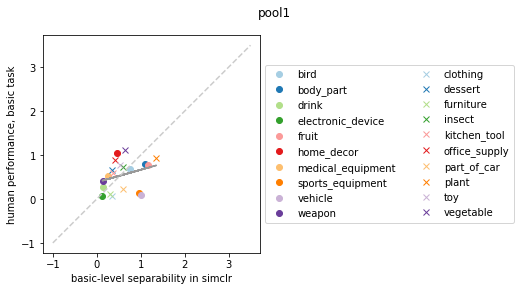

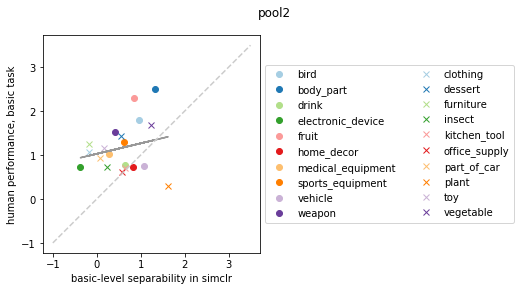

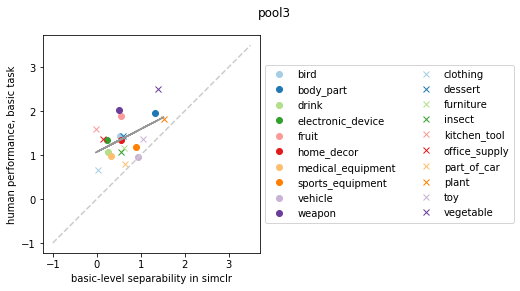

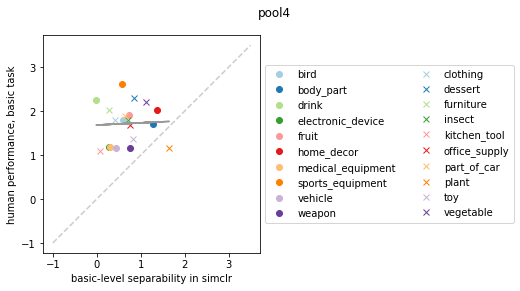

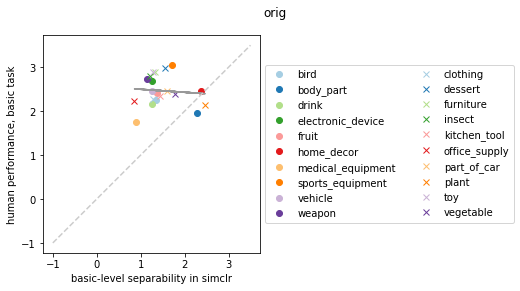

In [11]:
for cc in [0]:

    for ii in range(5):

        plt.figure(figsize=(12,4))

        lims = [-1, 3.5]

        ax = plt.subplot(1,1,1)

        xvals = []; yvals = []
        # pi=0
        # pi = 1
        allh = []
        for cbi in [0,1]:


            # SimCLR performance at basic-level classification, within supcat
            dist1 = d['dprime_basic_overall'][ii, super_cbinds==cbi]

            # human performance at basic-level classification, for each supcat
            dist2 = np.mean(dprime_by_supcat[cbi][:,cc,ii,:], axis=0)

            xvals+=[dist1]
            yvals+=[dist2]

            assert(np.all(dist1<lims[1]) & np.all(dist1>lims[0]))
            assert(np.all(dist2<lims[1]) & np.all(dist2>lims[0]))

            basic_colors = cm.Paired(np.linspace(0, 1, 12))[0:10,:]

            for bi in range(len(dist1)):

                h, = plt.plot(dist1[bi], dist2[bi], point_types[cbi], color=basic_colors[bi,:], alpha=1)

                allh+=[h]

        xvals = np.concatenate(xvals)
        yvals = np.concatenate(yvals)
        yhat, reg_coeffs, r2 = stats_utils.lin_reg(xvals, yvals)
        plt.plot(xvals, yhat, '-', color=[0.6, 0.6, 0.6])
        print(r2)
        print(scipy.stats.pearsonr(xvals, yvals))


        # plt.title('image set %d'%(cbi+1))

        plt.xlabel('basic-level separability in simclr')
        plt.ylabel('human performance, %s task'%cue_level_names[cc])

        plt.xlim(lims)
        plt.ylim(lims)

        plt.plot(lims,lims, color=[0.8, 0.8, 0.8], linestyle='--')

        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.6, box.height])

        plt.axis('square')
        # Put a legend to the right of the current axis
        ax.legend(allh, list(super_names), loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)


        plt.suptitle(image_type_names[ii])